In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import time
 
from torchvision import datasets

In [10]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))]
)

In [11]:
# get the data
trainset = datasets.MNIST(
    root = './data',
    train = True,
    download = True, 
    transform = transform
)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [12]:
trainloader = torch.utils.data.DataLoader(
    trainset, 
    batch_size = 4,
    shuffle = True
)

In [13]:
testset = datasets.MNIST(
    root = './data',
    train = False,
    download = True,
    transform = transform
)

In [15]:
testloader = torch.utils.data.DataLoader(
    testset, 
    batch_size = 4,
    shuffle = False
)

torch.Size([4, 1, 28, 28])
tensor([1, 3, 2, 7])


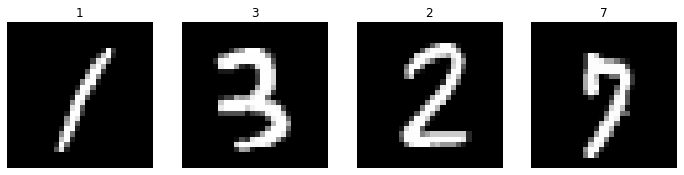

In [16]:
for batch_1 in trainloader:
    batch = batch_1
    break
 
print(batch[0].shape) # as batch[0] contains the image pixels -> tensors
print(batch[1]) # batch[1] contains the labels -> tensors
 
plt.figure(figsize=(12, 8))
for i in range (batch[0].shape[0]):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(batch[0][i].reshape(28, 28), cmap='gray')
    plt.title(int(batch[1][i]))
    plt.savefig('digit_mnist.png')
plt.show()

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, 
                               kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, 
                               kernel_size=5, stride=1)
        self.fc1 = nn.Linear(in_features=800, out_features=500)
        self.fc2 = nn.Linear(in_features=500, out_features=10)
 
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [18]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [19]:
net = Net().to(device)
print(net)

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


In [20]:
# loss function
criterion = nn.CrossEntropyLoss()
# optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [21]:
def train(net):
    start = time.time()
    for epoch in range(10): # no. of epochs
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # data pixels and labels to GPU if available
            inputs, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)
            # set the parameter gradients to zero
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            # propagate the loss backward
            loss.backward()
            optimizer.step()
 
            # print for mini batches
            running_loss += loss.item()
            if i % 5000 == 4999:  # every 5000 mini batches
                print('[Epoch %d, %5d Mini Batches] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss/5000))
                running_loss = 0.0
    end = time.time()
 
    print('Done Training')
    print('%0.2f minutes' %((end - start) / 60))
    
train(net)

[Epoch 1,  5000 Mini Batches] loss: 0.289
[Epoch 1, 10000 Mini Batches] loss: 0.084
[Epoch 1, 15000 Mini Batches] loss: 0.066
[Epoch 2,  5000 Mini Batches] loss: 0.044
[Epoch 2, 10000 Mini Batches] loss: 0.043
[Epoch 2, 15000 Mini Batches] loss: 0.038
[Epoch 3,  5000 Mini Batches] loss: 0.026
[Epoch 3, 10000 Mini Batches] loss: 0.030
[Epoch 3, 15000 Mini Batches] loss: 0.028
[Epoch 4,  5000 Mini Batches] loss: 0.023
[Epoch 4, 10000 Mini Batches] loss: 0.017
[Epoch 4, 15000 Mini Batches] loss: 0.020
[Epoch 5,  5000 Mini Batches] loss: 0.017
[Epoch 5, 10000 Mini Batches] loss: 0.015
[Epoch 5, 15000 Mini Batches] loss: 0.013
[Epoch 6,  5000 Mini Batches] loss: 0.011
[Epoch 6, 10000 Mini Batches] loss: 0.014
[Epoch 6, 15000 Mini Batches] loss: 0.013
[Epoch 7,  5000 Mini Batches] loss: 0.007
[Epoch 7, 10000 Mini Batches] loss: 0.009
[Epoch 7, 15000 Mini Batches] loss: 0.011
[Epoch 8,  5000 Mini Batches] loss: 0.006
[Epoch 8, 10000 Mini Batches] loss: 0.007
[Epoch 8, 15000 Mini Batches] loss

In [22]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
 
print('Accuracy of the network on test images: %0.3f %%' % (
    100 * correct / total))

Accuracy of the network on test images: 99.080 %


### Fashion MNIST Classification using PyTorch

In [23]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time

In [24]:
# define constants
NUM_EPOCHS = 10
BATCH_SIZE = 4
LEARNING_RATE = 0.001

In [25]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

In [26]:
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                             download=True, 
                                             transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                            download=True, 
                                            transform=transform)
 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                          shuffle=True)

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


In [27]:
classes = ('T-Shirt','Trouser','Pullover','Dress','Coat','Sandal',
           'Shirt','Sneaker','Bag','Ankle Boot')

torch.Size([4, 1, 28, 28])
torch.Size([4])



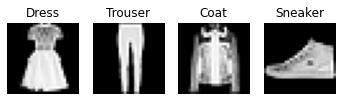

In [28]:
for batch_1 in trainloader:
    batch = batch_1
    break
 
print(batch[0].shape) # as batch[0] contains the image pixels -> tensors
print(batch[1].shape) # batch[1] contains the labels -> tensors
 
plt.figure(figsize=(12, 8))
for i in range (batch[0].shape[0]):
    plt.subplot(4, 8, i+1)
    plt.axis('off')
    plt.imshow(batch[0][i].reshape(28, 28), cmap='gray')
    plt.title(classes[batch[1][i]])
    plt.savefig('fashion_mnist.png')
plt.show()

### Build LeNet CNN Architecture

In [29]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, 
                               kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, 
                               kernel_size=5)
        self.fc1 = nn.Linear(in_features=256, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
 
net = LeNet()

In [30]:
# loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=LEARNING_RATE, momentum=0.9)


In [31]:
# if GPU is available, then use GPU, else use CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
net.to(device)

cuda:0


LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [32]:
# function to calculate accuracy
def calc_acc(loader):
    correct = 0
    total = 0
    for data in loader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    return ((100*correct)/total)

In [33]:
def train():
    epoch_loss = []
    train_acc = []
    test_acc = []
    for epoch in range(NUM_EPOCHS):
        running_loss = 0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
 
            # set parameter gradients to zero
            optimizer.zero_grad()
 
            # forward pass
            outputs = net(inputs)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()
 
            running_loss += loss.item()
 
        epoch_loss.append(running_loss/15000)
        train_acc.append(calc_acc(trainloader))
        test_acc.append(calc_acc(testloader))
        print('Epoch: %d of %d, Train Acc: %0.3f, Test Acc: %0.3f, Loss: %0.3f'
              % (epoch+1, NUM_EPOCHS, train_acc[epoch], test_acc[epoch], running_loss/15000))
        
    return epoch_loss, train_acc, test_acc

In [34]:
start = time.time()
epoch_loss, train_acc, test_acc = train()
end = time.time()
 
print('%0.2f minutes' %((end - start) / 60))

Epoch: 1 of 10, Train Acc: 84.530, Test Acc: 83.650, Loss: 0.622
Epoch: 2 of 10, Train Acc: 87.188, Test Acc: 86.250, Loss: 0.384
Epoch: 3 of 10, Train Acc: 87.902, Test Acc: 86.870, Loss: 0.333
Epoch: 4 of 10, Train Acc: 89.523, Test Acc: 87.870, Loss: 0.303
Epoch: 5 of 10, Train Acc: 90.527, Test Acc: 88.570, Loss: 0.283
Epoch: 6 of 10, Train Acc: 90.582, Test Acc: 88.440, Loss: 0.266
Epoch: 7 of 10, Train Acc: 91.140, Test Acc: 88.870, Loss: 0.254
Epoch: 8 of 10, Train Acc: 91.913, Test Acc: 89.350, Loss: 0.241
Epoch: 9 of 10, Train Acc: 91.737, Test Acc: 89.470, Loss: 0.232
Epoch: 10 of 10, Train Acc: 92.342, Test Acc: 89.680, Loss: 0.221
15.26 minutes


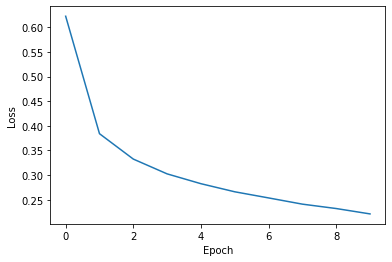

In [35]:
plt.figure()
plt.plot(epoch_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('fashion_loss.png')
plt.show()

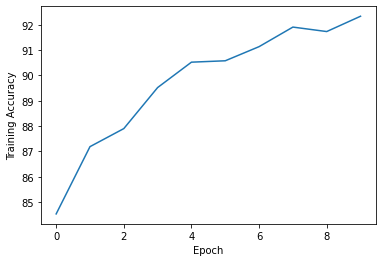

In [36]:
plt.figure()
plt.plot(train_acc)
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.savefig('fashion_train_acc.png')
plt.show()

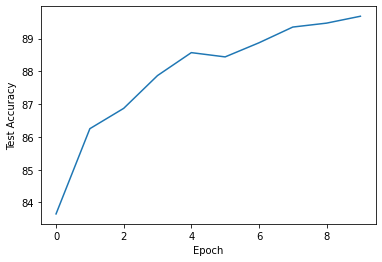

In [37]:
plt.figure()
plt.plot(test_acc)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.savefig('fashion_test_acc.png')
plt.show()